In [1]:
from qiskit.circuit import QuantumRegister, QuantumCircuit
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_histogram

In [2]:
def qrng_circuit(n: int):
    qr = QuantumRegister(n)
    circuit = QuantumCircuit(qr)
    for i in range(n):
        circuit.initialize('0',i)
    circuit.h(qr)
    circuit.measure_all()
    return circuit


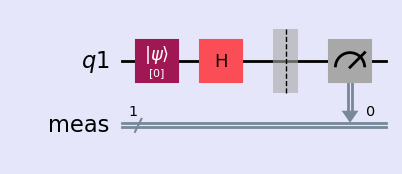

In [3]:
circuit = qrng_circuit(1)

style = {'backgroundcolor': 'lavender'}
circuit.draw(output='mpl', style = style)

In [9]:
def qrng(n):
    qc = qrng_circuit(n)
    bin_num = StatevectorSimulator().run(qc,memory=True)\
                .result().get_memory()[0]
    return int(f"0b{bin_num}", base=2)
    

In [17]:
qrng(16)

35043

In [6]:
backend = StatevectorSimulator()

In [7]:
n=1
circuit = qrng_circuit(n)

job = backend.run(circuits=circuit,shots=100)
circuit.reset(circuit.qubits)
result = job.result()
print(result.get_statevector(circuit))


Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


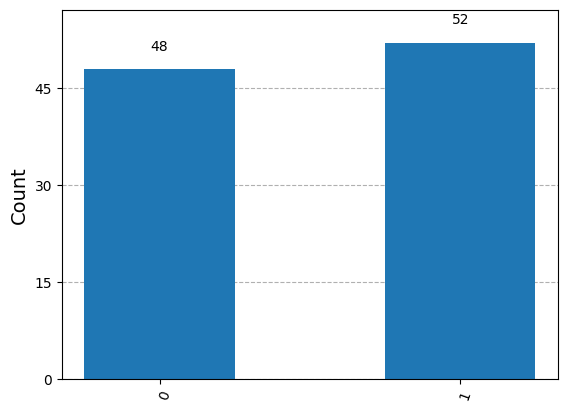

In [8]:
plot_histogram(result.get_counts(circuit))